# A Simple Neural network
## Part 1: Linear regression

This tutorial describes the simplest neural network possible, a 1 input 1 output linear regression model that has the goal to predict the target value $t$ from the input value $x$. The network is defined as having an input $x$ which gets transformed by the weight $w$ to generate the output $y$ by the formula $y = x * w$, and where $y$ needs to approximate the target $t$ as good as possible as defined by a cost function.

![Image of the simple neural network](https://dl.dropboxusercontent.com/u/8938051/Blog_images/SimpleANN01.png)

In regular neural networks, we typically have multiple layers, non-linear activation functions, and a bias for each node. In this tutorial we only have one layer with one weight parameter $w$, no activation function on the output, and no bias. In [simple linear regression](http://en.wikipedia.org/wiki/Simple_linear_regression) the parameter $w$ and bias are typically combined into the parameter vector $\beta$ where bias is the y-intercept and $w$ is the slope of the regression line. In linear regression, these parameters are typically fitted via the [least squares method](http://s-mat-pcs.oulu.fi/~mpa/matreng/ematr5_5.htm). 

In this tutorial, we will approximate the targets $t$ with the outputs of the model $y$ by minimizing the squared error cost function (= squared Euclidian distance). The squared error cost function is defined as $\Vert t - y \Vert ^2$. The minimization of the cost will be done with the [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent) optimization algorithm which is typically used in training of neural networks.

TODO: forward vs backwards (not necessary)?

In [1]:
# Python imports
import numpy  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
numpy.random.seed(seed=1)

## Define the target function

In this example, the targets $t$ will be generated from a function $f$ and additive [gaussian noise](http://en.wikipedia.org/wiki/Normal_distribution) sampled from $\mathcal{N}(0, 0.2)$, where $\mathcal{N}$ is the normal distribution with mean 0 and variance 0.2. $f$ is defined as $f(x) = x * 2$, with slope 2 and intercept 0. $t$ is $f(x) + \mathcal{N}(0, 0.2)$.

We will sample 20 input samples $x$ from the uniform distribution between 0 and 1, and then generate the target output values $t$ by the process described above. These resulting input $x$ and output $t$ are plotted against each other in the figure below together with the original $f(x)$ line without the gaussian noise.

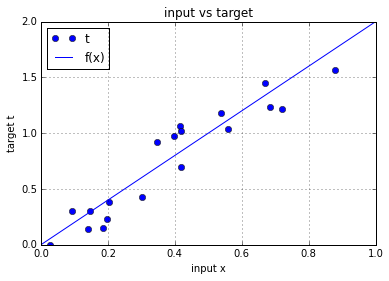

In [2]:
# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = numpy.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise so the estimation won't
# be perfect.
# Define a function f that represents the line that generates t without noise
def f(x): return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = numpy.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs target')
plt.grid()
plt.legend(loc=2)
plt.show()

## Define the cost function

We will optimize the model $y = x * w$ by tuning $w$ so that the [squared error cost](http://en.wikipedia.org/wiki/Euclidean_distance#Squared_Euclidean_distance) along all samples is minimized. The squared error cost is defined as $\xi = \sum_{i=1}^{n} \Vert t_i - y_i \Vert ^2$, with $n$ the number of samples in the training set. The optimization goal is thus:  $\underset{w}{\text{argmin}} \sum_{i=1}^{n} \Vert t_i - y_i \Vert^2$.   
Notice that we take the sum of errors over all samples, which is known as batch training. We could also update the parameters based upon one sample at a time, which is known as online training.

This cost function for variable $w$ is plotted in the figure below. The value $w=2$ is at the minimum of the cost function (bottom of the parabola), this value is the same value as the slope we choose for $f(x)$. Notice that this function is [convex](http://en.wikipedia.org/wiki/Convex_function) and that there is only one minimum: the global minimum. While every squared error cost function for linear regression is convex, this is not the case for other models and other cost functions.

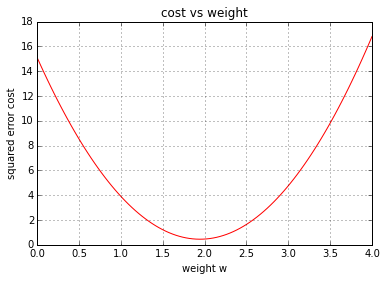

In [9]:
# Define the neural network function y = x * w
def nn(x, w): return x * w

# Define the cost function
def cost(y, t): return ((t - y)**2).sum()

# Define a vector of weights for which we want to plot the cost
ws = numpy.linspace(0, 4, num=100)  # weight values
cost_ws = numpy.vectorize(lambda w: cost(nn(x, w) , t))(ws)  # cost for each weight in ws

# Plot the cost vs the given weight w
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('weight w')
plt.ylabel('squared error cost')
plt.title('cost vs weight')
plt.grid()
plt.show()

## Optimizing the cost function

For a simple cost function like in this example, we can see by eye what the optimal weight should be. But the error surface can be quite [complex](https://en.wikipedia.org/wiki/Rastrigin_function) or have a high dimensionality (each parameter adds a new dimension). This is why we use [optimisation techniques](https://en.wikipedia.org/wiki/Mathematical_optimization) to find the minimum of the error function.

### Gradient descent

One optimization algorithm that we can use in the tuning of neural networks that is commonly used is the [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent) algorithm. The gradient descent algorithm works by taking the [derivative](http://en.wikipedia.org/wiki/Derivative) of the cost function $\xi$ with respect to the parameters at a specific position, and updates the parameters in the direction of the negative [gradient](http://en.wikipedia.org/wiki/Gradient). We iteratively update the parameter $w$ by taking steps proportional to the negative of the gradient:
$$w(k+1) = w(k) - \Delta w(k+1)$$

With $w(k)$ the value of $w$ at iteration $k$ during the gradient descent.  
$\Delta w$ is defined as:

$$\Delta w = \mu \frac{\partial \xi}{\partial w}$$

With $\mu$ the learning rate, which is how big of a step you take along the gradient, and ${\partial \xi}/{\partial w}$ the gradient of the cost function $\xi$ with respect to the weight $w$. This gradient can be splitted according to the [chain rule](http://en.wikipedia.org/wiki/Chain_rule) into:

$$\frac{\partial \xi}{\partial w} = \frac{\partial y}{\partial w} \frac{\partial \xi}{\partial y}$$

Where $\xi$ is the squared error cost, so the ${\partial \xi}/{\partial y}$ term can be written as:

$$\frac{\partial \xi}{\partial y} = \frac{\partial (t - y)^2}{\partial y} = - 2 (t-y) = 2 (y-t)$$

And since $y = x * w$ we can write ${\partial y}/{\partial w}$ as:

$$\frac{\partial y}{\partial w} = \frac{\partial (x * w)}{\partial w} = x $$

So the full update function $\Delta w$ will become

$$\Delta w = \mu * \frac{\partial \xi}{\partial w} = \mu * 2 x (y - t)$$

In the batch processing, we just add up all the gradients for each sample:

$$\Delta w = \mu * 2 * \sum_{i=1}^{n} x_i (y_i - t_i)$$

Notice that the factor 2 is not necessary, and can be incorporated in the learning rate. Which need to be tuned separately as a hyperparameter for each neural network.

To start out the gradient descent algorithm, you typically start with picking the initial parameters at random and start updating these parameters with $\Delta w$ until convergence.

In [4]:
# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t): return x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial weight parameter
w = 0.1
# Set the learning rate
learning_rate = 0.2

# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 4  # number of gradient descent updates
for i in xrange(nb_of_iterations):
    # Print the current w, and cost
    print 'w({}): {:.4f} \t cost: {:.4f}'.format(i, w, cost(nn(x, w), t))
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    w = w - dw  # update the current weight parameter

# Print the final w, and cost
print 'w({}): {:.4f} \t cost: {:.4f}'.format(nb_of_iterations, w, cost(nn(x, w), t))

w(0): 0.1000 	 cost: 13.6197
w(1): 1.5277 	 cost: 1.1239
w(2): 1.8505 	 cost: 0.4853
w(3): 1.9234 	 cost: 0.4527
w(4): 1.9399 	 cost: 0.4510


Notice in the previous outcome that the gradient descent algorithm quickly converges towards the target value around $2.0$. Let's try to plot these iterations of the gradient descent algorithm to visualise it more.

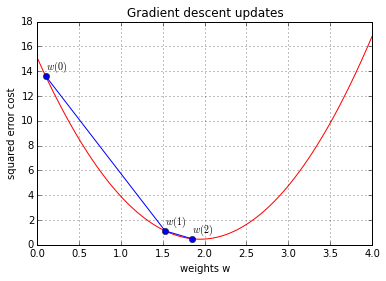

In [5]:
w = 0.1  # Set the initial weight parameter

# Start performing the gradient descent updates, and plot these steps
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
nb_of_iterations = 2  # number of gradient descent updates
for i in xrange(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    # Plot the weight-cost value and the line that represents the update
    plt.plot(w, cost(nn(x, w), t), 'bo')  # Plot the weight cost value
    plt.plot([w, w-dw],[cost(nn(x, w), t), cost(nn(x, w-dw), t)], 'b-')
    plt.text(w, cost(nn(x, w), t)+0.5, '$w({})$'.format(i))   
    w = w - dw  # update the current weight parameter
    
# Plot the last weight, axis, and show figure
plt.plot(w, cost(nn(x, w), t), 'bo')
plt.text(w, cost(nn(x, w), t)+0.5, '$w({})$'.format(nb_of_iterations))  
plt.xlabel('weight w')
plt.ylabel('squared error cost')
plt.title('Gradient descent updates')
plt.grid()
plt.show()

#### Gradient descent updates

The last figure shows the gradient descent updates of the weight parameters for 2 iterations. The blue dots represent the weight parameter values $w(k)$ at iteration $k$. Notice how the update differs from the position of the weight and the gradient at that point. The first update takes a much larger step than the second update because the gradient at $w(0)$ is much larger than the gradient at $w(1)$.

The regression line fitted by gradient descent with 10 iterations is shown in the figure below. The fitted line (red) lies close to the original line (blue), which is what indirectly tried to optimize via the noisy samples. Notice that both lines go through point $(0,0)$, this is because we didn't have a bias term, which represents the intercept, the intercept at $x=0$ is thus $t=0$.

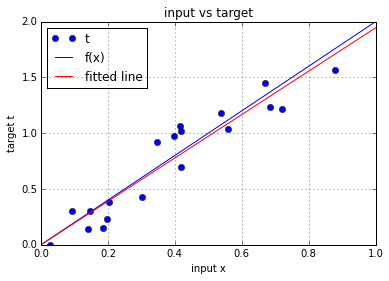

In [6]:
w = 0
# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 10  # number of gradient descent updates
for i in xrange(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    w = w - dw  # update the current weight parameter

# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
# plot the fitted line
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs target')
plt.grid()
plt.legend(loc=2)
plt.show()

This post is generated from an IPython notebook file. [Link to the full IPython notebook file](https://github.com/peterroelants/peterroelants.github.io/blob/master/notebooks/neuralnets/Simple_neural_network_part01.ipynb)